# Introduction

In this project, we applied advanced regression techniques to predict the price of the residential houses of Washington DC given different attributes of house. In this project we applied almost all concepts of predictive analytics including Exploratory data analysis, feature engineering, modeling and predictions.

From a buyer's perspective, we always thinks what are the key factors that drives the house prices? Why there is so much variablity in the prices of houses? Does old houses have higher price than the new ones? Some house have same living area and the same number of rooms, but have different prices just because of different locations. In this project, we explore the relationship between house attributes and house prices to answer some of these questions. 

## Goal
The goal of this project is to predict the price of a house given certain features of a house.

## Techniques Used
We use different regression models including Linear Regression, Ridge regression, Random Forest, and Gradient Boosting for predicting sale price of house. 

## Evaluation Criteria 
The evaluation criteria is Root-Mean-Squared-Error (RMSE) between the predicted value and the actual price. We picked the model which has least RMSE on test dataset.

### Research Questions

1. Is there a correlation between different features and how the given features relate to the Sale price of a house?
2. What is the best regression technique to predict the sale price?
3. Do complex models such as tree based gradient boosting provide any advantage over simple linear models?
4. What are the most important features or most significant features used by model to predict the price of house?

In [79]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [105]:
# read data
df = pd.read_csv("DC_Properties_trimmed.csv")

In [3]:
# let's see how data looks 
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,3.0,11/25/2003,1095000,Q,1,2522,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2,5,24,1680,7/22/2018,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,3.0,6/21/2016,2100000,Q,3,2522,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2,4,24,1680,7/22/2018,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,3.0,7/12/2006,1602000,Q,1,2484,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2,3,24,1680,7/22/2018,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,3.0,9/29/2011,1050000,Q,1,2401,1,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2,1,24,1627,7/22/2018,Residential,1746 1/2 T STREET NW,WASHINGTON,DC,20009,18S UJ 23124 09368,38.915408,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,2.0,5/3/2018,1430000,Q,4,1488,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,2,1,24,1424,7/22/2018,Residential,1727 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23142 09324,38.915017,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [4]:
df.tail()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
28895,3,0,Forced Air,N,3,13,8,1953,2016,1971,2.0,11/20/2000,118000,U,1,1600,1,2 Story,Multi,Average,Good,Common Brick,Built Up,Hardwood,3,0,23,5311,7/22/2018,Residential,4738 SOUTH CAPITOL TERRACE SW,WASHINGTON,DC,20032,18S UH 25768 98918,38.821822,-77.006996,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28896,3,0,Forced Air,N,3,14,6,1953,1999,1971,3.0,11/20/2000,1,U,1,2150,1,3 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,3,0,23,7811,7/22/2018,Residential,4734 SOUTH CAPITOL TERRACE SW,WASHINGTON,DC,20032,18S UH 25768 98925,38.821888,-77.006997,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28897,2,0,Forced Air,Y,2,10,4,1953,2017,1971,2.0,6/27/2016,185000,U,3,1600,1,2 Story,Multi,Average,Very Good,Common Brick,Built Up,Hardwood,2,0,23,5302,7/22/2018,Residential,111 JOLIET STREET SW,WASHINGTON,DC,20032,18S UH 25851 98915,38.821813,-77.006034,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28898,2,0,Forced Air,N,2,10,4,1953,2017,1971,2.0,7/27/2017,215000,U,4,1600,1,2 Story,Multi,Average,Good,Common Brick,Comp Shingle,Hardwood,2,0,23,3046,7/22/2018,Residential,135 JOLIET STREET SW,WASHINGTON,DC,20032,18S UH 25807 98865,38.821356,-77.006528,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
28899,2,0,Forced Air,Y,2,10,4,1953,2018,1971,2.0,11/8/2017,140000,U,2,1600,1,2 Story,Multi,Average,Very Good,Common Brick,Comp Shingle,Hardwood,2,0,23,5098,7/22/2018,Residential,139 JOLIET STREET SW,WASHINGTON,DC,20032,18S UH 25804 98859,38.821300,-77.006571,Congress Heights,016 A Congress Heights,10900,010900 2000,Ward 8,6254,-77.006347,38.821799,SW


In [5]:
# dimensions of data
df.shape

(28900, 46)

In [202]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'FULLADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
BATHRM                28900 non-null int64
HF_BATHRM             28900 non-null int64
HEAT                  28900 non-null object
AC                    28900 non-null object
NUM_UNITS             28900 non-null int64
ROOMS                 28900 non-null int64
BEDRM                 28900 non-null int64
AYB                   28900 non-null int64
YR_RMDL               28900 non-null int64
EYB                   28900 non-null int64
STORIES               28900 non-null float64
SALEDATE              28900 non-null object
PRICE                 28900 non-null int64
QUALIFIED             28900 non-null object
SALE_NUM              28900 non-null int64
GBA                   28900 non-null int64
BLDG_NUM              28900 non-null int64
STYLE                 28900 non-null object
STRUCT                28900 non-null object
GRADE                 28900 non-null object
CNDTN                 

In [203]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64','float64']).columns

cat = len(categorical_features)
num = len(numerical_features)

print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  22 categorical + 24 numerical = 46 features


The dataset consists of 28900 rows and 46 features including the target variable 'Price'

In [6]:
# Descriptive statistics
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,X,Y
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,2.890000e+04,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,1.261246,7.502872,3.482318,1922.556574,2004.259273,1969.125433,2.165972,6.549323e+05,2.072664,1736.508685,1.000138,1.302491,0.715848,13.724637,2852.047197,20009.906851,38.913195,-77.010707,5509.161730,2663.814844,-77.010712,38.913201
std,1.038695,0.588201,0.635730,2.319767,1.160678,22.339850,17.183443,10.547762,5.563060,6.048247e+05,1.667003,807.095292,0.011764,0.697155,0.982890,4.704569,2865.397209,7.541925,0.030292,0.041245,3297.000377,1704.447584,0.041238,0.030293
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,1.000000e+00,1.000000,407.000000,1.000000,0.000000,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,65.000000,-77.113135,38.820576
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,2.000000,3.100000e+05,1.000000,1224.000000,1.000000,1.000000,0.000000,11.000000,1419.000000,20002.000000,38.892645,-77.033455,2301.000000,1052.000000,-77.033397,38.892800
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,5.475000e+05,1.000000,1530.000000,1.000000,1.000000,0.000000,12.000000,1943.000000,20010.000000,38.911306,-77.005555,6700.000000,2621.000000,-77.005088,38.911421
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,2.000000,8.100000e+05,3.000000,2014.000000,1.000000,1.000000,1.000000,13.000000,3366.000000,20016.000000,38.933681,-76.985763,8301.000000,4011.000000,-76.986004,38.933636
max,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,826.000000,2.396029e+07,15.000000,14966.000000,2.000000,44.000000,13.000000,39.000000,155905.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000,-76.910511,38.982276


In the above table, we observed that features like 'AYB', 'YR_RMDL', 'ZIPCODE', should be treated as categorical instead of numerical as their avg and quantile does not make sense. Also, we observed that the target variable (price) has some unusually high value at max and the min value is 1. so we inspect these two observations to understand why price varied so much. 

In [70]:
# Descriptive statistics the target variable
df['PRICE'].describe().apply(lambda x: format(x, 'f'))

count       28892.000000
mean       654557.510176
std        603619.400819
min             1.000000
25%        310000.000000
50%        547500.000000
75%        810000.000000
max      23960287.000000
Name: PRICE, dtype: object

In [8]:
max_price = df.iloc[df['PRICE'].idxmax()]
max_price

BATHRM                                 7
HF_BATHRM                              3
HEAT                             Ht Pump
AC                                     Y
NUM_UNITS                              2
ROOMS                                 31
BEDRM                                 12
AYB                                 1805
YR_RMDL                             2004
EYB                                 2000
STORIES                             2.75
SALEDATE                        5/2/2007
PRICE                           23960287
QUALIFIED                              U
SALE_NUM                               1
GBA                                14966
BLDG_NUM                               1
STYLE                            3 Story
STRUCT                           Row End
GRADE                      Exceptional-C
CNDTN                          Very Good
EXTWALL                     Common Brick
ROOF                               Slate
INTWALL                         Hardwood
KITCHENS        

In [9]:
min_price = df.iloc[df['PRICE'].idxmin()]
min_price 

BATHRM                                            3
HF_BATHRM                                         0
HEAT                                     Forced Air
AC                                                N
NUM_UNITS                                         3
ROOMS                                            14
BEDRM                                             6
AYB                                            1953
YR_RMDL                                        1999
EYB                                            1971
STORIES                                           3
SALEDATE                                 11/20/2000
PRICE                                             1
QUALIFIED                                         U
SALE_NUM                                          1
GBA                                            2150
BLDG_NUM                                          1
STYLE                                       3 Story
STRUCT                                        Multi
GRADE       

We observed that tghe unusually high price of house can make sense as the number of rooms, bedrooms and bathrooms are high than average. But, the observation with price 1 seems an outlier.

In [87]:
# for c in categorical_features:
#     print(c , df[c].unique())  

# Data Visualization

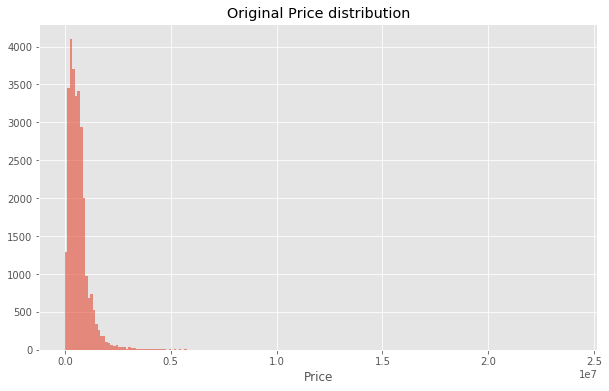

In [218]:
plt.figure(figsize=(10,6))
plt.hist(df["PRICE"],bins=200, alpha =0.6)
plt.title('Original Price distribution')
plt.xlabel('Price')
plt.show()

The price distribution is highly negatively skewed so we log transform the sale price. The log transformed prices does not follow normal distribution. The unusual low and high price of houses shifted the mean away from centre.

Text(0.5, 1.0, 'Transformed Price distribution')

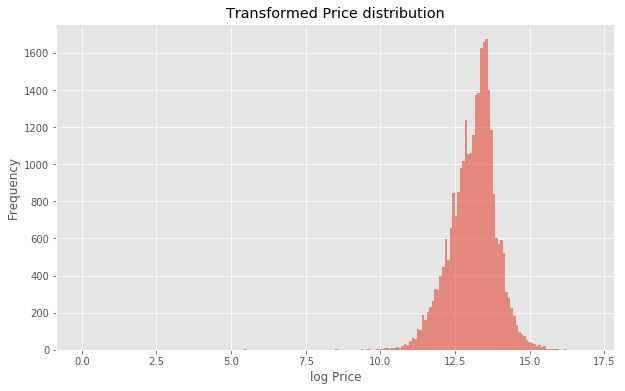

In [219]:
plt.figure(figsize=(10,6))
log_y = np.log(df["PRICE"])
plt.hist(log_y,bins = 200, alpha =0.6)
plt.ylabel('Frequency')
plt.xlabel('log Price')
plt.title('Transformed Price distribution')

Text(0.5, 1.0, 'Price distribution')

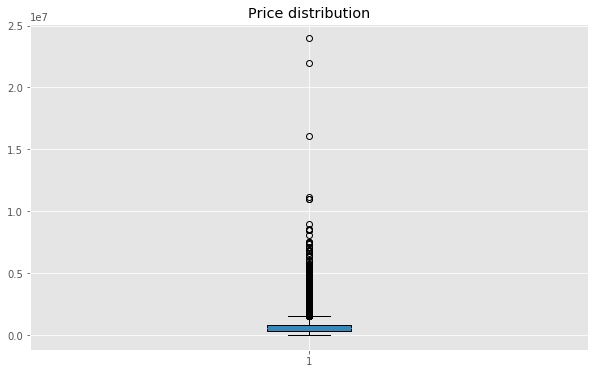

In [205]:
plt.figure(figsize=(10,6))
plt.boxplot(df['PRICE'],vert =True, patch_artist=True)
plt.title('Price distribution')

Text(0.5, 1.0, 'Correlation matrix')

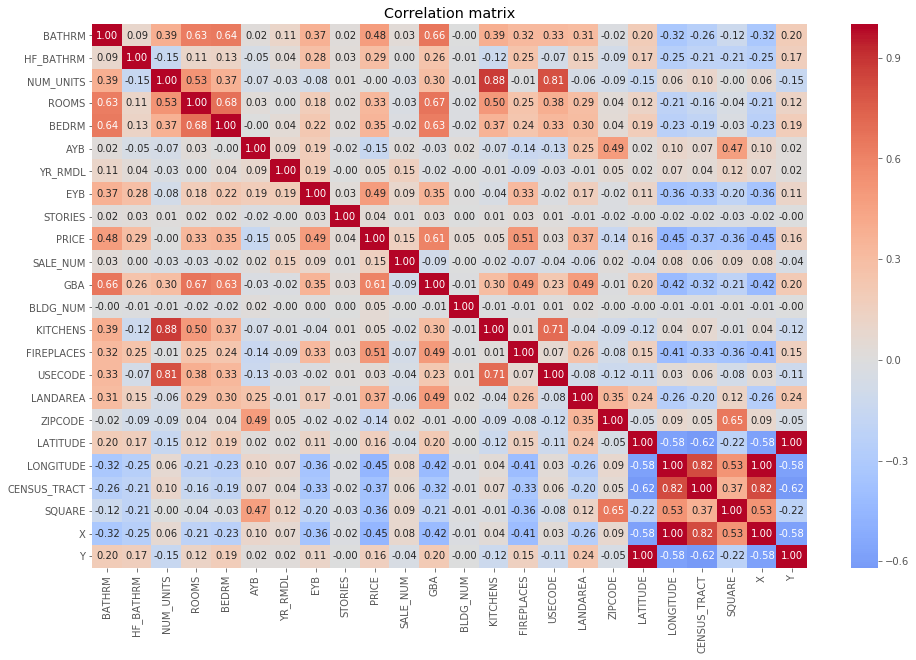

In [16]:
# to check multicolinearity
plt.figure(figsize=(16,10))
b = sns.heatmap(df.corr(),cmap='coolwarm', annot = True,fmt=".2f",
                center=0.0)
b.set_title("Correlation matrix")

We observed that there are certain features that are highly correlated to each other such as Kitchen and num of units. Also, the bottom right corner of correlation matrix reflects that some features such as X,Y,Square, Quadrant are highly correlated with the Latitude, Longitude and Zipcode. Since, all of these features are multicolinear and will add to the complexity of the model, we drop them for modeling purpose. 

Text(0.5, 1.0, 'Most correlated features relative to price')

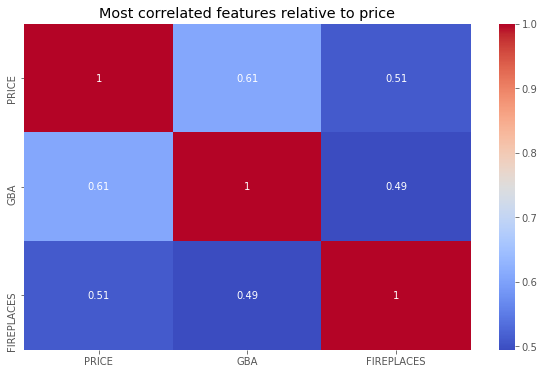

In [18]:
# Highly correlated features to price
corr = df.corr()
top_corr_features = corr.index[abs(corr["PRICE"])>0.5]
plt.figure(figsize=(10,6))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='coolwarm')
g.set_title("Most correlated features relative to price")

We observed that the Fireplaces and GBA are most correlated features to the price.

In [19]:
# check for null/na values in data
Na_values = df.isnull().sum()
print("There are {} Null/NA values in data".format(Na_values.sum()))

There are 0 Null/NA values in data


Text(0.5, 1.0, 'BEDROOM')

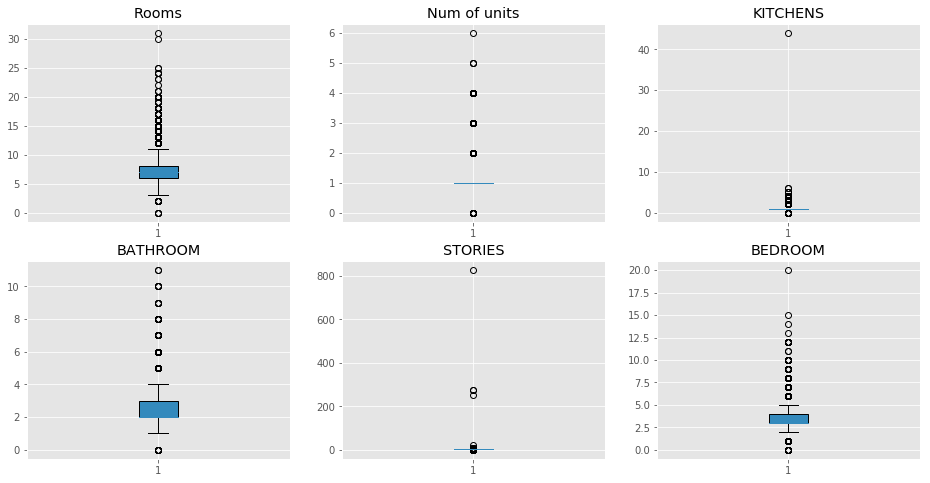

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes[0,0].boxplot(df['ROOMS'],vert =True, patch_artist=True)
axes[0,0].set_title("Rooms")

axes[0,1].boxplot(df['NUM_UNITS'],vert =True, patch_artist=True)
axes[0,1].set_title('Num of units')

axes[0,2].boxplot(df['KITCHENS'],vert =True, patch_artist=True)
axes[0,2].set_title('KITCHENS')

axes[1,0].boxplot(df['BATHRM'],vert =True, patch_artist=True)
axes[1,0].set_title('BATHROOM')

axes[1,1].boxplot(df['STORIES'],vert =True, patch_artist=True)
axes[1,1].set_title('STORIES')

axes[1,2].boxplot(df['BEDRM'],vert =True, patch_artist=True)
axes[1,2].set_title('BEDROOM')

The box plot of stories shows the outlier with more than 800 stories while the number of rooms and bedrooms are at max 30 so we can remove this observation because there is a possibility that these may be wrongly entered. Also the mean and median stories are upto 3. Similarly, only one observation with more than 40 kitchen is also an outlier.

The box plots for different features shows that there are many observations in which the values of Stories, Kitchen, rooms are wrongly updated as 0. There is also possibility that these houses are under construction or only land area.

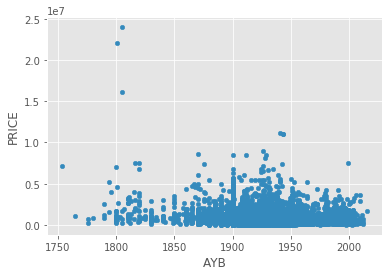

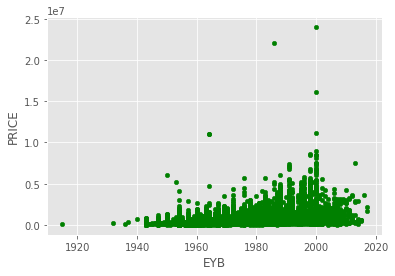

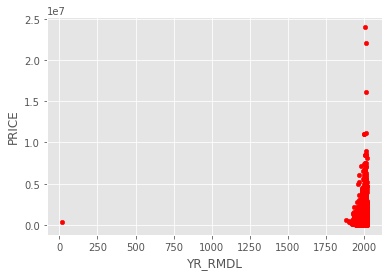

In [21]:
#fig, axes = plt.subplots(1, 3, figsize=(16, 8))
#plt.subplot(1,3,1)
df.plot.scatter(x = 'AYB', y = 'PRICE')
#plt.subplot(1,3,2)
df.plot.scatter(x = 'EYB', y = 'PRICE',color = 'green')
#plt.subplot(1,3,3)
df.plot.scatter(x = 'YR_RMDL', y = 'PRICE',color = 'red')

The year in which the house is remodeled cannot be 0. Since the actual year built started after the year 1750.So we have to remove this observation also.

### Inspecting Outliers

In [220]:
df.loc[df['STORIES']>100]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
2865,1,2,Hot Water Rad,N,1,6,3,1920,2001,1969,826.0,1/26/2015,760000,Q,5,1442,1,4 Story,Row Inside,Good Quality,Good,Common Brick,Metal- Sms,Wood Floor,1,0,11,966,7/22/2018,Residential,664 E STREET NE,WASHINGTON,DC,20002,18S UJ 26868 07163,38.896299,-76.996409,Old City 1,039 K Old City 1,8302,008302 1009,Ward 6,861,-76.997269,38.896641,NE
9022,2,1,Warm Cool,Y,1,7,3,1900,2008,1992,250.0,9/23/2015,1459000,Q,5,1425,1,2.5 Story Fin,Row Inside,Superior,Very Good,Common Brick,Comp Shingle,Hardwood,1,1,11,810,7/22/2018,Residential,2712 N STREET NW,WASHINGTON,DC,20007,18S UJ 21710 08438,38.906746,-77.056187,Georgetown,025 J Georgetown,100,000100 2006,Ward 2,1215,-77.056279,38.906508,NW
9247,4,2,Warm Cool,Y,1,10,4,1900,2004,2000,275.0,2/25/2011,5397500,U,1,3582,1,2.5 Story Fin,Row Inside,Exceptional-B,Very Good,Common Brick,Slate,Hardwood,2,4,12,5859,7/22/2018,Residential,2912 N STREET NW,WASHINGTON,DC,20007,18S UJ 21487 08439,38.906711,-77.058753,Georgetown,025 J Georgetown,100,000100 4006,Ward 2,1211,-77.058763,38.906383,NW
9503,2,1,Warm Cool,Y,1,7,3,1900,2006,1992,275.0,1/27/2017,1725000,Q,4,1584,1,3 Story,Row Inside,Superior,Very Good,Common Brick,Metal- Sms,Hardwood,1,2,11,982,7/22/2018,Residential,2721 O STREET NW,WASHINGTON,DC,20007,18S UJ 21688 08652,38.908668,-77.056496,Georgetown,025 J Georgetown,100,000100 2002,Ward 2,1260,-77.056450,38.908778,NW


The other features reflect that the more than 100 stories is incorrectly entered.Since the other features does not have unusualy high values.

In [221]:
df.loc[df['STORIES']<1]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
14516,3,1,Warm Cool,Y,2,8,5,1916,2001,1984,0.0,8/19/2011,1150000,Q,1,2400,1,2 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2,1,24,3550,7/22/2018,Residential,1786 LANIER PLACE NW,WASHINGTON,DC,20009,18S UJ 22906 10294,38.923706,-77.042873,Mt. Pleasant,036 B Mt. Pleasant,3900,003900 3003,Ward 1,2580,-77.041757,38.924157,NW
15996,3,0,Forced Air,N,1,6,4,1908,2009,1957,0.0,8/4/2009,274900,U,1,1418,1,2 Story,Row Inside,Above Average,Good,Common Brick,Metal- Sms,Hardwood,1,0,11,1067,7/22/2018,Residential,754 HARVARD STREET NW,WASHINGTON,DC,20001,18S UJ 24486 10605,38.926824,-77.024745,Columbia Heights,015 E Columbia Heights,3500,003500 1000,Ward 1,2887,-77.024503,38.926761,NW
20386,3,1,Forced Air,Y,1,8,3,1921,2018,1984,0.0,2/6/2018,762500,Q,3,1280,1,2 Story,Row End,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,2,0,11,1859,7/22/2018,Residential,16 CHANNING STREET NE,WASHINGTON,DC,20002,18S UJ 25902 10099,38.922547,-77.008282,Brookland,007 E Brookland,9203,009203 1005,Ward 5,3503,-77.008740,38.922789,NE
26112,1,0,Forced Air,Y,1,5,2,1945,2004,1956,0.0,12/15/2014,136000,U,3,832,1,2 Story,Row End,Average,Average,Common Brick,Comp Shingle,Carpet,1,0,11,1799,7/22/2018,Residential,6332 SOUTHERN AVENUE NE,WASHINGTON,DC,20019,18S UJ 34349 06593,38.892609,-76.910046,Deanwood,018 C Deanwood,7808,007808 2009,Ward 7,5269,-76.910511,38.892898,NE
26124,2,0,Forced Air,Y,1,6,3,1945,2010,1965,0.0,4/14/2010,214000,Q,1,930,1,2 Story,Row Inside,Average,Good,Common Brick,Comp Shingle,Hardwood,1,0,11,1464,7/22/2018,Residential,211 62ND STREET NE,WASHINGTON,DC,20019,18S UJ 34173 06566,38.892330,-76.912070,Deanwood,018 C Deanwood,7808,007808 2010,Ward 7,5270,-76.911635,38.892437,NE
28124,1,1,Hot Water Rad,Y,1,6,3,1916,2013,1964,0.0,7/26/2007,215000,Q,1,978,1,2 Story,Row End,Average,Good,Common Brick,Metal- Sms,Hardwood,1,0,11,1625,7/22/2018,Residential,2320 SHANNON PLACE SE,WASHINGTON,DC,20020,18S UJ 27123 03519,38.863528,-76.992549,Anacostia,002 A Anacostia,7401,007401 1036,Ward 8,5790,-76.991758,38.863541,SE


The structure column shows that these houses are 2 story houses.

###  Feature Engineering and Treating the outliers

In [ ]:
# df.drop(df.loc[df['PRICE']<=1].index,axis =0,inplace=True)
# df.drop(df.loc[df['PRICE']>20000000].index,axis =0,inplace=True)

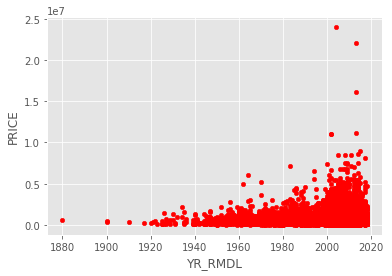

In [88]:
df.drop(df.loc[df['YR_RMDL']<1750].index,axis = 0, inplace = True)
df.plot.scatter(x = 'YR_RMDL', y = 'PRICE',color = 'red')

In [89]:
# drop values with most columns 0 or No data.
df.drop([8858], axis = 0, inplace = True)
df.drop([19494], axis = 0, inplace = True)

In [90]:
# stories drop invalid values 
df.drop(df.loc[df['STORIES']>200].index,axis = 0, inplace = True)
# all these house are 2 story as per stories column
df['STORIES'].replace(0.0,2,inplace = True)

In [91]:
# kitchen
df.drop(df.loc[df['KITCHENS']>10].index,axis = 0, inplace = True)
# all these houses have more than 1 rooms/bedrooms/bathrooms so no kitchen does not make sense
df['KITCHENS'].replace(0,1,inplace = True)

In [113]:
# delete multicolliner features 
processed_df = df.drop(['SALEDATE','GRADE','GIS_LAST_MOD_DTTM','SOURCE','FULLADDRESS','CITY','STATE',
                   'NATIONALGRID','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','WARD', 'QUADRANT','SQUARE','X','Y',
                   'CENSUS_TRACT','USECODE','EYB','BLDG_NUM','LATITUDE','LONGITUDE'],axis = 1)

In [142]:
#cols = ['ZIPCODE','AYB','YR_RMDL']
# labelencoder = LabelEncoder()
# processed_df[cols] = processed_df[cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
processed_df['ZIPCODE'] = processed_df.ZIPCODE.astype('category')
processed_df['AYB'] = processed_df.AYB.astype('category')
processed_df['YR_RMDL'] = processed_df.YR_RMDL.astype('category')

In [115]:
processed_df= pd.get_dummies(processed_df)
processed_df.shape

(28900, 147)

In [160]:
processed_df['ZIPCODE'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18],
                 ordered=False)

In [225]:
processed_df.head(2)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,STORIES,PRICE,SALE_NUM,GBA,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_No Data,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_0,AC_N,AC_Y,QUALIFIED_Q,QUALIFIED_U,STYLE_1 Story,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_4.5 Story Fin,STYLE_4.5 Story Unfin,STYLE_Bi-Level,STYLE_Default,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Default,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside,CNDTN_Average,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,EXTWALL_Aluminum,EXTWALL_Brick Veneer,EXTWALL_Brick/Siding,EXTWALL_Brick/Stone,EXTWALL_Brick/Stucco,EXTWALL_Common Brick,EXTWALL_Concrete,EXTWALL_Concrete Block,EXTWALL_Default,EXTWALL_Face Brick,EXTWALL_Hardboard,EXTWALL_Metal Siding,EXTWALL_Plywood,EXTWALL_Shingle,EXTWALL_Stone,EXTWALL_Stone Veneer,EXTWALL_Stone/Siding,EXTWALL_Stone/Stucco,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,ROOF_Built Up,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,ROOF_Wood- FS,INTWALL_Carpet,INTWALL_Ceramic Tile,INTWALL_Default,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,ASSESSMENT_NBHD_16th Street Heights,ASSESSMENT_NBHD_American University,ASSESSMENT_NBHD_Anacostia,ASSESSMENT_NBHD_Berkley,ASSESSMENT_NBHD_Brentwood,ASSESSMENT_NBHD_Brightwood,ASSESSMENT_NBHD_Brookland,ASSESSMENT_NBHD_Burleith,ASSESSMENT_NBHD_Capitol Hill,ASSESSMENT_NBHD_Chevy Chase,ASSESSMENT_NBHD_Columbia Heights,ASSESSMENT_NBHD_Congress Heights,ASSESSMENT_NBHD_Crestwood,ASSESSMENT_NBHD_Deanwood,ASSESSMENT_NBHD_Eckington,ASSESSMENT_NBHD_Fort Dupont Park,ASSESSMENT_NBHD_Georgetown,ASSESSMENT_NBHD_Hillcrest,ASSESSMENT_NBHD_Kalorama,ASSESSMENT_NBHD_Kent,ASSESSMENT_NBHD_Ledroit Park,ASSESSMENT_NBHD_Lily Ponds,ASSESSMENT_NBHD_Marshall Heights,ASSESSMENT_NBHD_Mt. Pleasant,ASSESSMENT_NBHD_Old City 1,ASSESSMENT_NBHD_Old City 2,ASSESSMENT_NBHD_Palisades,ASSESSMENT_NBHD_Petworth,ASSESSMENT_NBHD_Randle Heights,ASSESSMENT_NBHD_Spring Valley,ASSESSMENT_NBHD_Trinidad,ASSESSMENT_NBHD_Wesley Heights,ASSESSMENT_NBHD_Woodridge
0,4,0,2,8,4,181,65,3.0,1095000,1,2522,2,5,1680,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3,1,2,9,5,181,90,3.0,2100000,3,2522,2,4,1680,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [147]:
processed_df['AYB'].describe()

count     28900
unique      193
top         170
freq       3206
Name: AYB, dtype: int64

In [143]:
processed_df['ZIPCODE'].describe()

count     28900
unique       19
top           1
freq       5704
Name: ZIPCODE, dtype: int64

In [144]:
processed_df['YR_RMDL'].describe()

count     28900
unique      100
top          92
freq       1735
Name: YR_RMDL, dtype: int64

# Modeling

In [148]:
X = processed_df.drop('PRICE',axis =1)
y = processed_df['PRICE']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 124)

### Multinomial Linear Regression

In [133]:
# standardization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [168]:
# model fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize = True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [169]:
print("lm_score:", lm.score(X_train,y_train))
# predictions
lm_train_predictions = lm.predict(X_train)
lm_test_predictions  = lm.predict(X_test)

lm_score: 0.6560189769442174


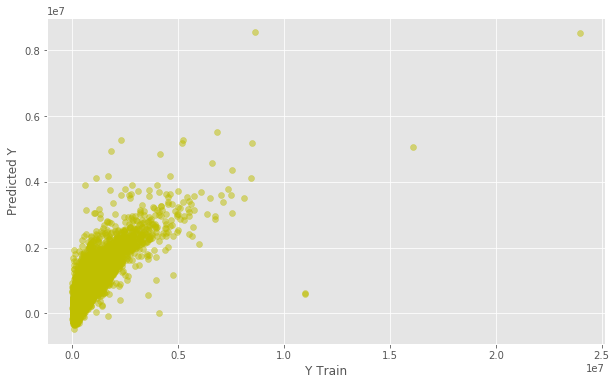

In [170]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,lm_train_predictions,color='y',alpha = 0.5)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')
plt.show()

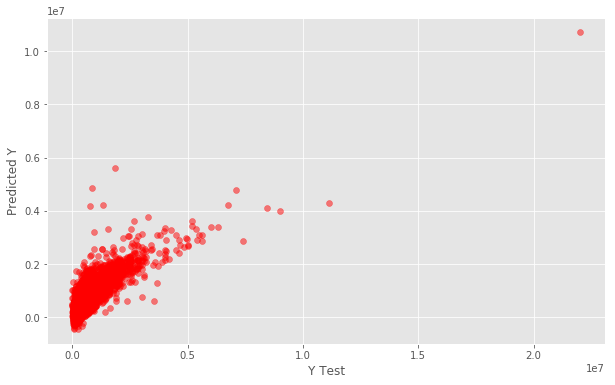

In [171]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,lm_test_predictions,color='r',alpha = 0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [172]:
# Evaluation
print('MSE_lm_train:' , metrics.mean_squared_error(y_train, lm_train_predictions ))
print('RMSE_lm_train:' , np.sqrt(metrics.mean_squared_error(y_train, lm_train_predictions )))
      
print('MSE_lm_test:', metrics.mean_squared_error(y_test, lm_test_predictions))
print('RMSE_lm_test:', np.sqrt(metrics.mean_squared_error(y_test, lm_test_predictions)))

MSE_lm_train: 125665153030.79694
RMSE_lm_train: 354492.8109719532
MSE_lm_test: 122111582385.39655
RMSE_lm_test: 349444.6771456056


### Ridge Regression

In [173]:
from sklearn.linear_model import Ridge
ridge =  Ridge(alpha = 1.0, normalize = True, random_state = 124)
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=124, solver='auto', tol=0.001)

In [174]:
ridge.score(X_train,y_train)

0.5845499095623599

In [175]:
ridge_pred_y_train = ridge.predict(X_train)
print("Rmse of ridge on train data: %.2f"%np.sqrt(metrics.mean_squared_error(y_train,ridge_pred_y_train)))
ridge_pred_y = ridge.predict(X_test)
print("Rmse of ridge on test data: %.2f"%np.sqrt(metrics.mean_squared_error(y_test,ridge_pred_y)))

Rmse of ridge on train data: 389582.66
Rmse of ridge on test data: 390822.92


### Random Forest 


In [176]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=500, n_jobs=-1,random_state=124)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=124, verbose=0, warm_start=False)

In [177]:
RF.score(X_train,y_train)

0.9615943858688898

In [178]:
y_pred_RF_train = RF.predict(X_train)
print("Root Mean squared error on train data: %.2f"
      % np.sqrt(metrics.mean_squared_error(y_train,y_pred_RF_train)))
# Predict on test data and save predictions
y_pred_rf_test = RF.predict(X_test)
print("Root Mean squared error on test data: %.2f"
      % np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_test)))
# Predict on test data and save prediction

Root Mean squared error on train data: 118450.68
Root Mean squared error on test data: 294571.79


### Gradient Boosting 

In [193]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


params = {'n_estimators': 500, 'max_depth': 5, 'random_state' : 124,
          'learning_rate': 0.1, 'loss': 'ls'}

gbreg = ensemble.GradientBoostingRegressor(**params)

gbreg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=124, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [194]:
# predictions
gb_train_pred = gbreg.predict(X_train)
gb_test_preds = gbreg.predict(X_test)

In [195]:
gb_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, gb_train_pred ))
print("Gradient boosting RMSE on train data : %f" % (gb_rmse_train))
gb_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, gb_test_preds ))
print("Gradient boosting RMSE on test data: %f"% (gb_rmse_test))

Gradient boosting RMSE on train data : 141871.799462
Gradient boosting RMSE on test data: 277046.214616


In [196]:
# Saving model results
results=pd.DataFrame()
results['Features']=X_train.columns
results['Importance'] = gbreg.feature_importances_
results.sort_values(by='Importance',ascending=False,inplace=True)
# 20 Most important features in prediction
top_20 = results[:20]

Text(0.5, 1.0, 'Top 20 important features')

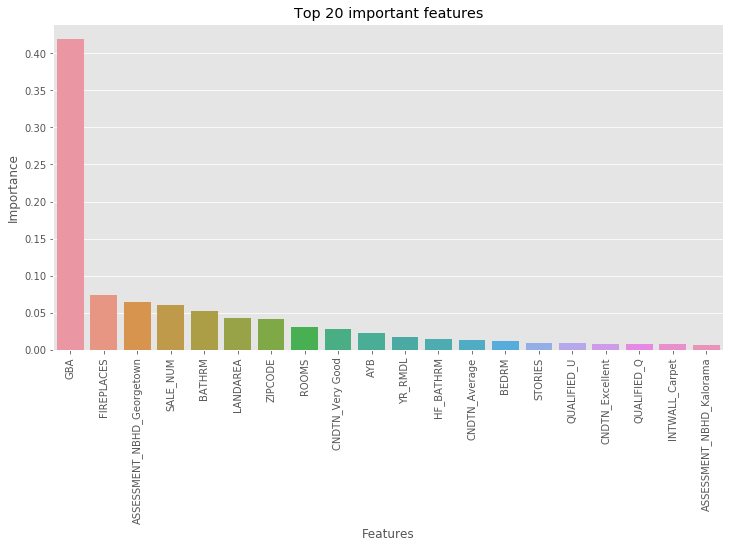

In [197]:
# Plot feature importance
plt.figure(figsize=(12,6))
Features_xgb = sns.barplot(x="Features", y="Importance",data =top_20)
plt.xticks(rotation=90)
Features_xgb.set_title("Top 20 important features")


In [200]:
error_dict = {'Linear Regression': [354492.81,349444.67], 'Ridge Regression':[389582.66,390822.92],
              'Random Forest':[118450.68,294571.79], 'Gradient Boosting':[141871.79,277046.21]}

In [201]:
error_df = pd.DataFrame.from_dict(error_dict, orient = 'index', columns = ['RMSE_TRAIN', 'RMSE_TEST'])
error_df 

,RMSE_TRAIN,RMSE_TEST
Linear Regression,354492.81,349444.67
Ridge Regression,389582.66,390822.92
Random Forest,118450.68,294571.79
Gradient Boosting,141871.79,277046.21


## Conclusion

- The GBA feature is highly correlated with the price and also most important feature in predicting the house price.
- Fireplace, Assessment neighborhood, Zipcode, Rooms, age and condition of house are also important features in predicting the price.
- Interior or exterior of walls, roof, structutre and style of the house are less important compared to area and number of rooms and location.
- Increasing model complexity helps in improving model's predictive performance. Random Forest is more complex model  than linear regression model and performed better than it. 
- Features have non-linear relationship with the traget variable, hence non-linear models performed better than linear models.
- As expected, gradient boosting helps in further improving performance as it tries to learn from model errors. We find that among the 3 models that we tried, gradient boosting performed the best.
